# TP1. scikit-learn + Naive Bayes

<img src="http://media.giphy.com/media/2lbhL8dSGMh8I/giphy.gif"  width="200">


Le module de Machine Learning en Python : scitkit-learn (sklearn)
http://scikit-learn.org/stable/

## Plan :

   [- Iris dataset](#1)
   
   [- Naive Bayes](#2)
   
   [- Mon Naive Bayes](#3)
   
   [- Tests](#4)

In [58]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

<img src="http://78.media.tumblr.com/ec97315a70ebd605ac05f3b91feadaa5/tumblr_monmpxBfcM1qirapio1_500.gif" width = 200>
<a id="1"></a> 
 
# 1. Iris dataset


On va chercher le dataset **iris** dans le module sklearn

In [59]:
from IPython.display import clear_output
clear_output(wait=True)

In [60]:
from sklearn import datasets
iris = datasets.load_iris()

In [61]:
type(iris)

sklearn.utils.Bunch

In [62]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [63]:
type(iris.target)

numpy.ndarray

In [64]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<img src="http://media.giphy.com/media/c1zviFHCf4pq0/giphy.gif" width = 200>
<a id="2"></a> 
 
# 2. Naive Bayes


In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(BaseNB)
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via `partial_fit` method.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like, shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  Attributes
 |  ----------
 |  class_prior_ : array, shape (n_classes,)
 |      probability of each class.
 |  
 |  class_count_ : array, shape (n_classes,)
 |      number of training samples observed in each class.
 |  
 |  theta_ : array, shape (n_classes, n_features)
 |      mean of eac

In [67]:
gnb = GaussianNB()
help(gnb.fit)

Help on method fit in module sklearn.naive_bayes:

fit(self, X, y, sample_weight=None) method of sklearn.naive_bayes.GaussianNB instance
    Fit Gaussian Naive Bayes according to X, y
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples
        and n_features is the number of features.
    
    y : array-like, shape (n_samples,)
        Target values.
    
    sample_weight : array-like, shape (n_samples,), optional (default=None)
        Weights applied to individual samples (1. for unweighted).
    
        .. versionadded:: 0.17
           Gaussian Naive Bayes supports fitting with *sample_weight*.
    
    Returns
    -------
    self : object
        Returns self.



In [68]:
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
       % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
iris.data.shape

(150L, 4L)

In [72]:
train = np.random.choice(range(150), 75, replace=False)
train

array([ 23,  39,  33, 134,  88,  10,  73, 130,  12, 148,  27, 109,  99,
        25,  24,  83,  71,  35, 139,  11,  79, 126,  45,  81,  91,  74,
        97,  49,  63,  22, 103, 122, 115,  61, 123, 117, 102, 145,  30,
        89,  29, 116,  20,  67,   2,  96, 107,   7, 142,  28,  65,  44,
        82,  86,  54, 114, 105,  38, 125,  62,  17, 111,  32,  18,  78,
       128, 140, 131, 108,  41,  40,   4,  59,  72,  26])

In [73]:
a = range(150)
test = np.delete(a, train)

In [74]:
y_pred2 = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
print(y_pred2)
print(iris.target[test,])
(iris.target[test,] != y_pred2).sum()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


6

## Etude TRAIN / TEST

La fonction NB renvoie le pourcentage d'erreur de prédiction du label (les 3 types d'espèce) pour une répétition de nb tirage aléatoire sur un ensemble d'entrainement (train) de taille i (i variant de A à B).

In [75]:
def NB(A,B,nb):
    res = []
    for i in range(B-A+1):
        temp = 0
        for j in range(nb):
            train = np.random.choice(range(150), A+i, replace=False)
            a = range(150)
            test = np.delete(a, train)
            y_pred = gnb.fit(iris.data[train,], iris.target[train,]).predict(iris.data[test,])
            temp = temp +(iris.target[test,] != y_pred).sum()/(float(len(test)))
        res = res + [100*temp/nb]
    return res


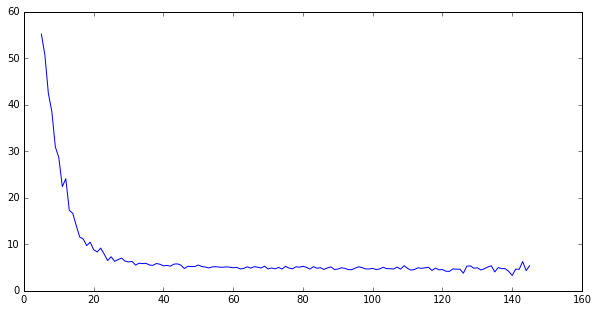

In [76]:
A = 5
B = 145
plt.figure(figsize=(10,5))
plt.plot(np.linspace(A,B,B-A+1), NB(A,B,100));

<img src="http://media3.giphy.com/media/KYMR9VsDGs3PW/giphy.gif" width = 200>
<a id="3"></a> 
 
# 3. Mon Naive Bayes

In [78]:
def MonNaiveBayes(train, test):
    #TARGET
    unique, counts = np.unique(train.target, return_counts=True)
    freq = counts/float(len(train.target))
    dic = dict(zip(unique, freq)) 
    estimM = np.zeros(shape=(len(unique),train.data.shape[1]))
    estimV = np.zeros(shape=(len(unique),train.data.shape[1])) 
    #DATA : estimation
    l = 0
    for tar in unique:
        estimM[l,] = np.apply_along_axis(np.mean, 0, train.data[train.target == tar,])
        estimV[l,] = np.apply_along_axis(np.var, 0, train.data[train.target == tar,])
        l = l+1
    
    choice = np.zeros(shape=(test.data.shape[0],len(unique)))
    #DATA : test 
    for i in range(test.data.shape[0]):
        for j in range(len(unique)):
            choice[i,j] = -0.5*sum((test.data[i]-estimM[j])*(test.data[i]-estimM[j])/estimV[j]) + np.log(freq[j]) - 0.5*np.log(np.prod(estimV[j,]))
    res = np.argmax(choice, axis=1)
    return res

In [79]:
MonNaiveBayes(iris, iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## On compare gnb et MonNaiveBayes

In [80]:
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
y_my_pred = MonNaiveBayes(iris, iris)
print(y_pred)
print(y_my_pred)
(y_pred == y_my_pred).sum()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


150

<img src="http://media2.giphy.com/media/GgtcDmMa97FhC/200.gif" width = 200>
<a id="3"></a> 
 
# 3. Tests

In [81]:
import copy

In [82]:
nb_train = 50

iris2 = copy.deepcopy(iris)

train = np.random.choice(range(150), nb_train, replace=False)
iris2.data = iris2.data[train]
iris2.target = iris2.target[train]

In [83]:
y_pred = gnb.fit(iris2.data, iris2.target).predict(iris.data)
y_my_pred = MonNaiveBayes(iris2, iris)
print(y_pred)
print(y_my_pred)
(y_pred == y_my_pred).sum()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


150